## Папоротский Михаил, БКЛ181
## Домашнее задание 2 (часть 2)

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

%matplotlib inline

### Пункт 1

Загружаем текст:

In [2]:
with open('diletanti.txt', encoding='utf-8-sig') as f:
    text = f.read()

Токенизируем с помощью nltk:

In [3]:
from nltk.tokenize import word_tokenize

words = word_tokenize(text)

Делаем разбор через pymorphy, загружаем данные о каждом слове в словарь и делаем список из словарей:

In [4]:
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()

anas = []

for word in words:
    if word.isalpha():
        pymorphy_ana = morph.parse(word)
        p = pymorphy_ana[0]
        anas.append({
                    "word": p.word,
                    "lex": p.normal_form,
                    "pos": p.tag.POS,
                    "animacy": p.tag.animacy,
                    "aspect": p.tag.aspect,
                    "case": p.tag.case,
                    "gender": p.tag.gender,
                    "involvement": p.tag.involvement,
                    "mood": p.tag.mood,
                    "number": p.tag.number,
                    "person": p.tag.person,
                    "tense": p.tag.tense,
                    "transitivity": p.tag.transitivity,
                    "voice": p.tag.voice
                    })

Создаем датафрейм и выводим первые 20 строк:

In [5]:
import pandas as pd

df = pd.DataFrame(anas)

df.head(20)

,word,lex,pos,animacy,aspect,case,gender,involvement,mood,number,person,tense,transitivity,voice
0,булат,булат,NOUN,anim,None,nomn,masc,None,None,sing,None,None,None,None
1,шалвович,шалва,NOUN,anim,None,nomn,masc,None,None,sing,None,None,None,None
2,окуджава,окуджава,NOUN,anim,None,nomn,masc,None,None,sing,None,None,None,None
3,путешествие,путешествие,NOUN,inan,None,accs,neut,None,None,sing,None,None,None,None
4,дилетантов,дилетант,NOUN,anim,None,gent,masc,None,None,plur,None,None,None,None
5,роман,роман,NOUN,anim,None,nomn,masc,None,None,sing,None,None,None,None
6,посвящаю,посвящать,VERB,None,impf,None,None,None,indc,sing,1per,pres,tran,None
7,оле,оля,NOUN,anim,None,datv,femn,None,None,sing,None,None,None,None
8,ибо,ибо,CONJ,None,None,None,None,None,None,None,None,None,None,None
9,природа,природа,NOUN,inan,None,nomn,femn,None,None,sing,None,None,None,None


### Пункт 2

Распределение слов по роду:

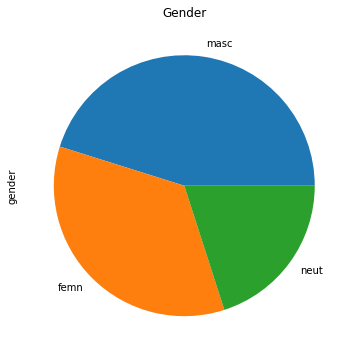

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
df['gender'].value_counts().plot(kind='pie')
plt.title('Gender')
plt.show()

Вордклауд:

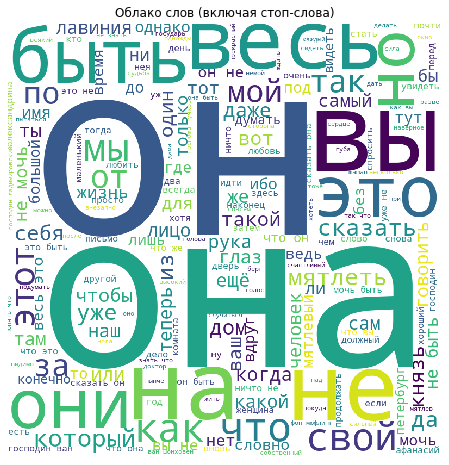

In [7]:
from wordcloud import WordCloud

text = ' '.join(df['lex'])

wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800,
).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов (включая стоп-слова)')
plt.show()

Гистограмма:

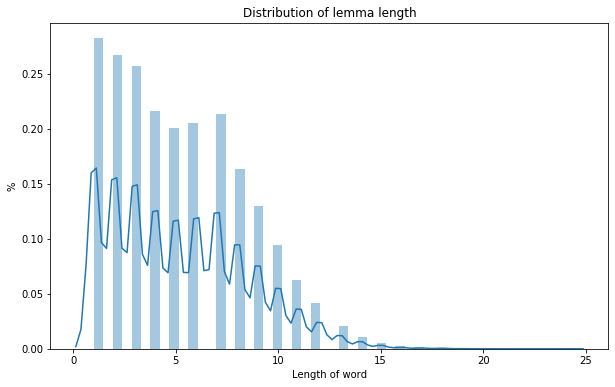

In [8]:
import seaborn as sns

df['length'] = df['lex'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(df['length'])
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word')
plt.show()

### Пункт 4

График по героям книги с помощью nltk dispersion plot:

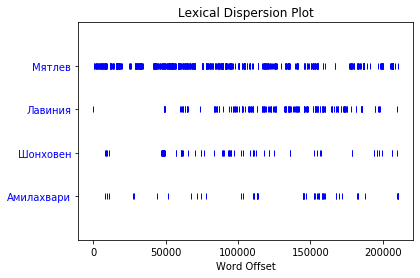

In [9]:
import nltk

myText = nltk.Text(words)
myText.dispersion_plot(["Мятлев", "Лавиния", "Шонховен", "Амилахвари"])